In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML:a-z/SVR/Boston Housing Prices.csv")

In [ ]:
df.describe()

In [ ]:
len(df)

In [ ]:
df.corr()

In [ ]:
abs(df.corr())['cmedv'].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['rooms'], y=df['cmedv'])
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars)')
plt.title('Boston Housing Prices')
plt.show()

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(df['rooms']).reshape(-1,1)
y = np.array(df['cmedv']).reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error 

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))
    
mae = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mae))

# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['rooms'], y=df['cmedv'])
plt.plot(X_test, lm.predict(X_test), color='red')
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars)')
plt.title('Linear Regression Prediction')
plt.show()

## SVR

### Define performance results function

In [ ]:
def svr_results(y_test, X_test, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    
    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))
    
    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    print("MAE = ${:,.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x=df['rooms'], y=df['cmedv'])
    plt.plot(X_test, fitted_svr_model.predict(X_test), color='red')
    plt.plot(X_test, fitted_svr_model.predict(X_test)+eps, color='black')
    plt.plot(X_test, fitted_svr_model.predict(X_test)-eps, color='black')
    plt.xlabel('# of Rooms')
    plt.ylabel('House Price (Thousands of Dollars)')
    plt.title('SVR Prediction')
    plt.show()

### Simple LinearSVR

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
eps = 5
svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)

In [ ]:
svr.fit(X_train, y_train)

In [ ]:
svr_results(y_test, X_test, svr)

### Larger Penalty ( = Larger C)

In [ ]:
eps = 5
svr_high_C = LinearSVR(epsilon=eps, C=1.0, fit_intercept=True)

In [ ]:
svr_high_C.fit(X_train, y_train)

In [ ]:
svr_results(y_test, X_test, svr_high_C)

More points are within our margin (epsilon), since we increased C to 1.0

### Vary C 

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
test_mae_list = []
perc_within_eps_list = []

eps = 5
c_space = np.linspace(0.01, 10)

for c in c_space:
    varied_svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True, max_iter=10000)
    
    varied_svr.fit(X_train, y_train)
    
    test_mae = mean_absolute_error(y_test, varied_svr.predict(X_test))
    test_mae_list.append(test_mae)
    
    perc_within_eps = 100*np.sum(abs(y_test-varied_svr.predict(X_test)) <= eps) / len(y_test)
    perc_within_eps_list.append(perc_within_eps)

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mae_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

In [ ]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
C = c_space[inds[0]]

print("best C =", C)

best C = 6.1263265306122445


###### Best C from GridSearch

In [ ]:
eps = 5
svr_best_C = LinearSVR(epsilon=eps, C=C, fit_intercept=True)
svr_best_C.fit(X_train, y_train)
svr_results(y_test, X_test, svr_best_C)

----

### Bonus: Grid Search over C and Epsilon

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [ ]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)

#### Scoring Criteria = MAE

In [ ]:
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
grid_svr.fit(X_train, y_train)

C:\Users\tomsharp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\tomsharp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=10000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.6...
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='

In [ ]:
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

LinearSVR(C=10.0, dual=True, epsilon=0.41775510204081634, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

C: 10.0
Epsilon: 0.41775510204081634
Intercept: -34.287
Coefficient: 9.055
MAE = $4,411.90
Percentage within Epsilon = 87.25%


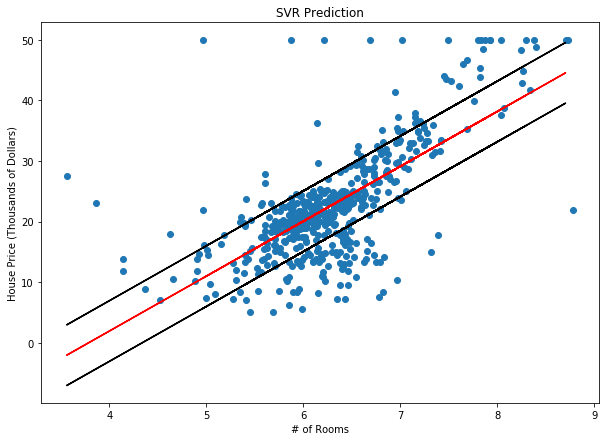

In [ ]:
svr_results(y_test, X_test, best_grid_svr_mae)

#### Scoring Critera = % within Epsilon 

In [ ]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
def frac_within_eps(y_true, y_pred):
    return np.sum(abs(y_true-y_pred) <= eps) / len(y_true)

my_scorer = make_scorer(frac_within_eps, greater_is_better=True)

In [ ]:
grid_svr_eps = GridSearchCV(svr_gridsearch, grid, scoring=my_scorer, cv=5)

In [ ]:
grid_svr_eps.fit(X_train, y_train)

C:\Users\tomsharp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\tomsharp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\tomsharp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=10000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.6...
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=m

In [ ]:
best_grid_svr_eps = grid_svr_eps.best_estimator_

In [ ]:
best_grid_svr_eps.fit(X_train, y_train)

LinearSVR(C=7.553469387755102, dual=True, epsilon=0.41775510204081634,
          fit_intercept=True, intercept_scaling=1.0, loss='epsilon_insensitive',
          max_iter=10000, random_state=None, tol=0.0001, verbose=0)

C: 7.553469387755102
Epsilon: 0.41775510204081634
Intercept: -33.032
Coefficient: 8.875
MAE = $4,415.66
Percentage within Epsilon = 88.24%


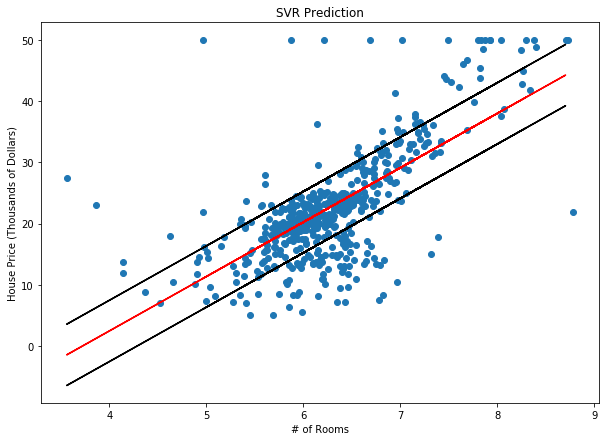

In [ ]:
svr_results(y_test, X_test, best_grid_svr_eps)